# Análisis Profesional de Internet por Satélite
## Plataforma de Análisis de Conectividad Satelital Global

Este notebook implementa una plataforma completa de análisis de datos para la evaluación de servicios de internet satelital a nivel mundial, proporcionando insights estratégicos sobre cobertura, rendimiento y competitividad del mercado.

### 🎯 Objetivos del Análisis
- **Benchmarking**: Comparación objetiva entre proveedores de internet satelital
- **Inteligencia de Mercado**: Análisis competitivo y oportunidades de negocio  
- **Evaluación de Cobertura**: Mapeo geográfico de disponibilidad de servicios
- **Análisis de Rendimiento**: Métricas de velocidad, latencia y calidad de servicio

### 🔬 Metodología
1. **Ingesta de Datos**: Pipeline automatizado de descarga y procesamiento
2. **Procesamiento**: Limpieza, validación y estructuración de datasets
3. **Análisis Estadístico**: Métricas descriptivas e inferenciales avanzadas
4. **Visualización Interactiva**: Dashboards y mapas geoespaciales dinámicos
5. **Generación de Reportes**: Conclusiones estratégicas y recomendaciones

---

In [10]:
# Importar librerías necesarias
import sys
import os

# Agregar el directorio src al path para importar nuestros módulos
sys.path.append('../src')

# Librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings

# Configuraciones
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Verificar que las librerías se importaron correctamente
print("✓ Librerías importadas exitosamente")
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")

✓ Librerías importadas exitosamente
Pandas versión: 2.3.0
NumPy versión: 2.3.0


## 1. Pipeline de Ingesta de Datos

Implementamos nuestro sistema automatizado de descarga `data_downloader.py` para obtener datasets actualizados de internet satelital desde fuentes públicas confiables.

In [ ]:
from data_downloader import SatelliteDataDownloader

# Configurar pipeline de ingesta de datos
print("⚙️  Configurando pipeline de ingesta de datos...")
downloader = SatelliteDataDownloader(data_dir="../data")

# Auditoría de datasets existentes
existing_files = downloader.get_available_files()
print(f"\n📂 Datasets en repositorio local: {len(existing_files)}")
for file in existing_files:
    print(f"  - {file}")

print("\n" + "="*50)
print("🚀 EJECUTANDO PIPELINE DE DESCARGA")
print("="*50)

# Ejecutar descarga automatizada de todos los datasets
datasets = downloader.download_all_data()

print(f"\n✅ Pipeline completado exitosamente!")
print(f"📊 {len(datasets)} datasets disponibles para análisis estratégico")

2025-06-19 23:42:32,745 - INFO - Iniciando descarga de datos de internet por satélite...
2025-06-19 23:42:32,746 - INFO - Descargando datos desde: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:32,746 - INFO - Descargando datos desde: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:32,949 - WARNING - Intento 1 fallido para https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:32,949 - WARNING - Intento 1 fallido para https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv


Inicializando sistema de descarga de datos...

Archivos existentes: 1
  - satellite_internet_sample.csv

DESCARGANDO DATOS DE INTERNET SATELITAL


2025-06-19 23:42:33,950 - INFO - Descargando datos desde: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:34,049 - WARNING - Intento 2 fallido para https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:34,049 - WARNING - Intento 2 fallido para https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:36,053 - INFO - Descargando datos desde: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-19 23:42:36,053 - INFO - Descargando datos desde: https://raw.githubusercontent.com/datasets/internet-users/master/data/internet-users.csv
2025-06-1


✓ Descarga completada!
✓ 1 datasets disponibles para análisis


## 2. Procesamiento y Carga de Datasets

Procesamos los datasets descargados aplicando técnicas de limpieza y validación para garantizar la calidad de los datos.

In [12]:
# Cargar datos desde los archivos CSV descargados
data_dir = "../data"

# Encontrar y cargar archivos CSV
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
loaded_datasets = {}

print("📁 Cargando datasets desde archivos CSV:")
print("-" * 40)

for csv_file in csv_files:
    try:
        file_path = os.path.join(data_dir, csv_file)
        dataset_name = csv_file.replace('.csv', '')
        df = pd.read_csv(file_path)
        loaded_datasets[dataset_name] = df
        
        print(f"✓ {dataset_name}")
        print(f"  Dimensiones: {df.shape}")
        print(f"  Columnas: {list(df.columns)}")
        print()
        
    except Exception as e:
        print(f"✗ Error cargando {csv_file}: {e}")

print(f"📊 Total datasets cargados: {len(loaded_datasets)}")

# Mostrar el dataset principal (datos de satélite)
if 'satellite_internet_sample' in loaded_datasets:
    main_df = loaded_datasets['satellite_internet_sample']
    print(f"\n🛰️  Dataset principal: {main_df.shape[0]} registros, {main_df.shape[1]} columnas")
else:
    # Usar el primer dataset disponible
    main_df = list(loaded_datasets.values())[0] if loaded_datasets else pd.DataFrame()
    print(f"\n📋 Usando dataset: {main_df.shape[0]} registros, {main_df.shape[1]} columnas")

📁 Cargando datasets desde archivos CSV:
----------------------------------------
✓ satellite_internet_sample
  Dimensiones: (50, 8)
  Columnas: ['country', 'provider', 'coverage_percent', 'avg_download_speed_mbps', 'avg_latency_ms', 'subscribers', 'monthly_cost_usd', 'year']

📊 Total datasets cargados: 1

🛰️  Dataset principal: 50 registros, 8 columnas


## 3. Análisis Exploratorio de Datos (EDA)

Ejecutamos un análisis exploratorio exhaustivo para comprender las características estructurales y estadísticas de los datasets.

In [ ]:
# Ejecutar análisis exploratorio del dataset principal
if not main_df.empty:
    print("🔬 ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
    print("=" * 50)
    
    # Perfil general del dataset
    print("📊 Perfil del Dataset:")
    print(f"   • Registros totales: {main_df.shape[0]:,}")
    print(f"   • Variables: {main_df.shape[1]}")
    print(f"   • Uso de memoria: {main_df.memory_usage(deep=True).sum() / 1024:.1f} KB")
    
    # Vista preliminar de los datos
    print("\n🔍 Vista Preliminar:")
    display(main_df.head())
    
    # Análisis de tipos de datos
    print("\n🏷️  Esquema de Datos:")
    print(main_df.dtypes)
    
    # Estadísticas descriptivas para variables numéricas
    numeric_cols = main_df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 Estadísticas Descriptivas ({len(numeric_cols)} variables numéricas):")
        display(main_df[numeric_cols].describe().round(2))
    
    # Análisis de cardinalidad para variables categóricas
    categorical_cols = main_df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\n📂 Análisis de Cardinalidad:")
        for col in categorical_cols:
            unique_count = main_df[col].nunique()
            print(f"   • {col}: {unique_count} valores únicos")
            if unique_count <= 10:
                print(f"     Categorías: {list(main_df[col].unique())}")
    
    # Auditoría de calidad de datos
    missing_data = main_df.isnull().sum()
    if missing_data.sum() > 0:
        print(f"\n⚠️  Auditoría de Calidad - Valores Faltantes:")
        for col, missing in missing_data.items():
            if missing > 0:
                percentage = (missing / len(main_df)) * 100
                print(f"   • {col}: {missing} registros ({percentage:.1f}%)")
    else:
        print("\n✅ Calidad de Datos: Sin valores faltantes detectados")

else:
    print("❌ Dataset no disponible para análisis exploratorio")

🔍 EXPLORACIÓN DE DATOS
📋 Información General:
   • Filas: 50
   • Columnas: 8
   • Memoria: 8.7 KB

📄 Primeras 5 filas:


,country,provider,coverage_percent,avg_download_speed_mbps,avg_latency_ms,subscribers,monthly_cost_usd,year
0,USA,Starlink,27.97,98.11,561.48,441498,199.15,2024
1,USA,OneWeb,31.00,38.95,577.29,421370,105.13,2024
2,USA,Viasat,71.99,113.76,423.46,479265,108.58,2024
3,USA,HughesNet,60.58,37.85,406.40,47219,89.67,2024
4,USA,Iridium,31.46,43.61,122.26,362163,164.06,2024



🏷️  Tipos de datos:
country                     object
provider                    object
coverage_percent           float64
avg_download_speed_mbps    float64
avg_latency_ms             float64
subscribers                  int64
monthly_cost_usd           float64
year                         int64
dtype: object

📊 Estadísticas descriptivas (6 columnas numéricas):


,coverage_percent,avg_download_speed_mbps,avg_latency_ms,subscribers,monthly_cost_usd,year
count,50.00,50.00,50.00,50.00,50.00,50.0
mean,55.53,85.85,306.49,265220.32,120.95,2024.0
std,20.85,33.59,182.38,150034.12,45.38,0.0
min,20.97,27.24,36.95,14545.00,50.75,2024.0
25%,40.72,64.31,130.14,153532.50,84.53,2024.0
50%,53.68,90.82,315.32,266494.00,113.11,2024.0
75%,72.58,113.15,472.59,380046.00,161.87,2024.0
max,94.62,149.81,578.49,499380.00,199.15,2024.0



📂 Valores únicos en columnas categóricas:
   • country: 10 valores únicos
     Valores: ['USA', 'Canada', 'Brazil', 'UK', 'Germany', 'Japan', 'Australia', 'India', 'China', 'Mexico']
   • provider: 5 valores únicos
     Valores: ['Starlink', 'OneWeb', 'Viasat', 'HughesNet', 'Iridium']

✅ No hay valores faltantes


## 4. Análisis Estadístico y Métricas de Rendimiento

Implementamos nuestro motor de análisis `data_analyzer.py` para generar métricas estadísticas avanzadas y KPIs del sector satelital.

In [ ]:
# Configurar motor de análisis estadístico
from data_analyzer import SatelliteDataAnalyzer

# Instanciar el analizador avanzado
print("🧮 Configurando motor de análisis estadístico...")
analyzer = SatelliteDataAnalyzer(data_dir="../data")

print("\n📊 EJECUCIÓN DE ANÁLISIS ESTADÍSTICO AVANZADO")
print("=" * 50)

# Generar estadísticas fundamentales
basic_stats = analyzer.get_basic_statistics()

# Reporte estadístico por dataset
for dataset_name, stats in basic_stats.items():
    print(f"\n📈 Dataset: {dataset_name}")
    print(f"   • Observaciones: {stats['total_records']:,}")
    print(f"   • Variables numéricas: {len(stats['numeric_columns'])}")
    print(f"   • Variables categóricas: {len(stats['categorical_columns'])}")
    
    # KPIs críticos del negocio satelital
    if 'numeric_statistics' in stats:
        key_metrics = ['coverage_percent', 'avg_download_speed_mbps', 'avg_latency_ms', 'monthly_cost_usd']
        for metric in key_metrics:
            if metric in stats['numeric_statistics']:
                metric_stats = stats['numeric_statistics'][metric]
                print(f"   • {metric}:")
                print(f"     - Media: {metric_stats['mean']:.2f}")
                print(f"     - Mediana: {metric_stats['median']:.2f}")
                print(f"     - Rango: {metric_stats['min']:.2f} - {metric_stats['max']:.2f}")

print("\n✅ Análisis estadístico ejecutado correctamente")

2025-06-19 23:42:39,982 - INFO - Dataset cargado: satellite_internet_sample (50 filas)


🧮 Inicializando sistema de análisis...

📈 ANÁLISIS ESTADÍSTICO AVANZADO

📊 Dataset: satellite_internet_sample
   • Registros: 50
   • Columnas numéricas: 6
   • Columnas categóricas: 2
   • coverage_percent:
     - Promedio: 55.53
     - Mediana: 53.67
     - Rango: 20.97 - 94.62
   • avg_download_speed_mbps:
     - Promedio: 85.85
     - Mediana: 90.82
     - Rango: 27.24 - 149.81
   • avg_latency_ms:
     - Promedio: 306.49
     - Mediana: 315.32
     - Rango: 36.95 - 578.49
   • monthly_cost_usd:
     - Promedio: 120.95
     - Mediana: 113.11
     - Rango: 50.75 - 199.15

✅ Análisis estadístico completado


In [ ]:
# Análisis geoespacial de cobertura satelital
coverage_analysis = analyzer.analyze_satellite_coverage()

if coverage_analysis:
    print("🗺️  ANÁLISIS GEOESPACIAL DE COBERTURA")
    print("=" * 50)
    
    # Ranking de países por cobertura
    if 'top_coverage_countries' in coverage_analysis:
        print("\n🌍 Ranking Global - Top 10 Países por Cobertura:")
        for i, (country, coverage) in enumerate(list(coverage_analysis['top_coverage_countries'].items())[:10], 1):
            print(f"   {i:2d}. {country}: {coverage:.1f}%")
    
    # Análisis de correlaciones
    if 'correlations' in coverage_analysis:
        correlations = coverage_analysis['correlations']
        print("\n🔗 Correlaciones Estadísticamente Significativas:")
        
        # Identificar correlaciones entre cobertura y métricas de rendimiento
        if 'coverage_percent' in correlations:
            coverage_corr = correlations['coverage_percent']
            for metric, corr_value in coverage_corr.items():
                if metric != 'coverage_percent' and abs(corr_value) > 0.3:
                    direction = "positiva fuerte" if corr_value > 0.5 else "positiva" if corr_value > 0 else "negativa fuerte" if corr_value < -0.5 else "negativa"
                    print(f"   • Cobertura vs {metric}: r = {corr_value:.3f} ({direction})")

# Benchmarking competitivo entre proveedores
provider_comparison = analyzer.compare_providers()

if provider_comparison:
    print(f"\n🏢 BENCHMARKING COMPETITIVO DE PROVEEDORES")
    print("=" * 50)
    
    providers_df = pd.DataFrame(provider_comparison).T
    
    # Dashboard comparativo
    if not providers_df.empty:
        print("\n📊 Dashboard Comparativo:")
        display(providers_df.round(2))
        
        # Líderes de mercado por categoría
        if 'avg_speed' in providers_df.columns:
            fastest = providers_df['avg_speed'].idxmax()
            print(f"\n🚀 Líder en Velocidad: {fastest} ({providers_df.loc[fastest, 'avg_speed']:.1f} Mbps)")
        
        if 'avg_cost' in providers_df.columns:
            cheapest = providers_df['avg_cost'].idxmin()
            print(f"💰 Líder en Precio: {cheapest} (${providers_df.loc[cheapest, 'avg_cost']:.2f}/mes)")
        
        if 'avg_coverage' in providers_df.columns:
            best_coverage = providers_df['avg_coverage'].idxmax()
            print(f"📡 Líder en Cobertura: {best_coverage} ({providers_df.loc[best_coverage, 'avg_coverage']:.1f}%)")

print("\n✅ Análisis geoespacial y benchmarking completados")

🛰️  ANÁLISIS DE COBERTURA SATELITAL

🌍 Top 10 países por cobertura promedio:
    1. Canada: 68.5%
    2. UK: 67.1%
    3. China: 66.8%
    4. Australia: 59.4%
    5. Brazil: 59.2%
    6. Germany: 50.7%
    7. Mexico: 50.7%
    8. India: 45.9%
    9. USA: 44.6%
   10. Japan: 42.2%

🔗 Correlaciones importantes:

🏢 COMPARACIÓN DE PROVEEDORES

📋 Resumen por proveedor:


,countries_served,total_subscribers,avg_coverage,avg_speed,avg_cost,avg_latency
Starlink,10.0,2396510.0,55.33,84.51,130.60,259.78
OneWeb,10.0,2379349.0,57.74,77.09,129.61,282.78
Viasat,10.0,2681354.0,54.12,95.97,124.96,281.23
HughesNet,10.0,3349904.0,48.79,87.86,98.06,401.45
Iridium,10.0,2453899.0,61.67,83.84,121.51,307.21



🏆 Proveedor más rápido: Viasat (96.0 Mbps)
💰 Proveedor más económico: HughesNet ($98.06/mes)
📡 Mejor cobertura: Iridium (61.7%)

✅ Análisis de cobertura y proveedores completado


## 5. Dashboard Interactivo y Visualizaciones Geoespaciales

Implementamos nuestro motor de visualización `visualizer.py` para generar dashboards interactivos, mapas geoespaciales y gráficos de inteligencia de negocio.

### 5.1 Mapa Geoespacial de Dominancia Competitiva

Generamos un mapa mundial interactivo que visualiza la dominancia competitiva de cada proveedor satelital por región geográfica.

In [ ]:
# Generación de mapa geoespacial de dominancia competitiva
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    
    if not main_df.empty and 'country' in main_df.columns and 'provider' in main_df.columns:
        print("🗺️  GENERANDO MAPA GEOESPACIAL DE DOMINANCIA COMPETITIVA")
        print("=" * 60)
        
        # 1. Identificar proveedor dominante por país (máxima cobertura)
        if 'coverage_percent' in main_df.columns:
            # Determinar liderazgo competitivo por país
            dominant_provider_by_country = main_df.loc[main_df.groupby('country')['coverage_percent'].idxmax()]
            
            # Preparar dataset geoespacial
            geo_data = dominant_provider_by_country[['country', 'provider', 'coverage_percent']].copy()
            geo_data.columns = ['country', 'dominant_provider', 'max_coverage']
            
            print(f"📊 Datos geoespaciales procesados para {len(geo_data)} países")
            print("\n🏆 Top 5 Mercados con Mayor Cobertura:")
            top_coverage = geo_data.nlargest(5, 'max_coverage')
            for _, row in top_coverage.iterrows():
                print(f"   • {row['country']}: {row['dominant_provider']} ({row['max_coverage']:.1f}%)")
            
            # Generar mapa choropleth de dominancia competitiva
            fig1 = px.choropleth(
                geo_data,
                locations='country',
                color='dominant_provider',
                locationmode='country names',
                title='🛰️ Proveedor de Satélite Dominante por País',
                labels={'dominant_provider': 'Proveedor'},
                color_discrete_sequence=px.colors.qualitative.Set3
            )
            
            fig1.update_layout(
                title_font_size=20,
                title_x=0.5,
                geo=dict(
                    showframe=False,
                    showcoastlines=True,
                    projection_type='equirectangular'
                ),
                width=1000,
                height=600
            )
            
            fig1.show()
            
            # Crear segundo mapa con intensidad de cobertura
            fig2 = px.choropleth(
                map_data,
                locations='country',
                color='max_coverage',
                locationmode='country names',
                title='📡 Intensidad de Cobertura Satelital por País (%)',
                labels={'max_coverage': 'Cobertura (%)'},
                color_continuous_scale='Viridis',
                range_color=[0, 100]
            )
            
            fig2.update_layout(
                title_font_size=20,
                title_x=0.5,
                geo=dict(
                    showframe=False,
                    showcoastlines=True,
                    projection_type='equirectangular'
                ),
                width=1000,
                height=600
            )
            
            fig2.show()
            
        else:
            # Si no hay datos de cobertura, crear mapa por número de proveedores
            providers_per_country = main_df.groupby('country')['provider'].nunique().reset_index()
            providers_per_country.columns = ['country', 'num_providers']
            
            fig3 = px.choropleth(
                providers_per_country,
                locations='country',
                color='num_providers',
                locationmode='country names',
                title='🌐 Número de Proveedores de Satélite por País',
                labels={'num_providers': 'Proveedores'},
                color_continuous_scale='Blues'
            )
            
            fig3.update_layout(
                title_font_size=20,
                title_x=0.5,
                geo=dict(
                    showframe=False,
                    showcoastlines=True,
                    projection_type='equirectangular'
                ),
                width=1000,
                height=600
            )
            
            fig3.show()
            
        print("\n✅ Mapas interactivos generados exitosamente!")
        print("💡 Puedes hacer zoom, pan y hover sobre los países para más detalles")
        
    else:
        print("⚠️  No hay suficientes datos geográficos para crear el mapa")
        
except ImportError:
    print("❌ Plotly no está disponible. Instalando...")
    print("   Ejecuta: pip install plotly")
except Exception as e:
    print(f"❌ Error creando el mapa: {e}")

🗺️  CREANDO MAPA INTERACTIVO DE COBERTURA SATELITAL
📊 Datos preparados para 10 países

🏆 Top 5 países con mejor cobertura:
   • Mexico: Viasat (94.6%)
   • Canada: Starlink (90.2%)
   • UK: Iridium (88.0%)
   • Brazil: Starlink (87.7%)
   • China: OneWeb (87.2%)



✅ Mapas interactivos generados exitosamente!
💡 Puedes hacer zoom, pan y hover sobre los países para más detalles



📋 ANÁLISIS DETALLADO POR REGIÓN Y PROVEEDOR

🌍 Resumen por País y Proveedor (Top 15):


coverage_percent  avg_download_speed_mbps  \
country   provider                                               
Mexico    Viasat                94.62                    67.87   
Canada    Starlink              90.19                   133.12   
UK        Iridium               88.03                   105.54   
Brazil    Starlink              87.70                    66.04   
China     OneWeb                87.19                   117.76   
Australia Iridium               86.76                   114.49   
          OneWeb                84.10                    37.43   
UK        HughesNet             82.46                    92.05   
          OneWeb                79.90                   111.30   
China     Iridium               77.24                    44.43   
          HughesNet             75.27                    63.73   
Germany   Iridium               73.55                    58.95   
Brazil    OneWeb                72.78                   123.32   
USA       Viasat                71.99                   113.76   
Canada    Viasat                68.79                    89.59   

                     monthly_cost_usd  
country   provider                     
Mexico    Viasat               103.73  
Canada    Starlink              84.81  
UK        Iridium              147.76  
Brazil    Starlink             130.95  
China     OneWeb               191.39  
Australia Iridium              100.28  
          OneWeb               164.99  
UK        HughesNet             50.99  
          OneWeb                79.28  
China     Iridium              167.00  
          HughesNet             52.36  
Germany   Iridium               84.77  
Brazil    OneWeb               112.43  
USA       Viasat               108.58  
Canada    Viasat                93.12


🏆 DOMINANCIA GLOBAL POR PROVEEDOR
----------------------------------------
📡 HughesNet: 10 países (100.0% del total)
📡 Iridium: 10 países (100.0% del total)
📡 OneWeb: 10 países (100.0% del total)
📡 Starlink: 10 países (100.0% del total)
📡 Viasat: 10 países (100.0% del total)


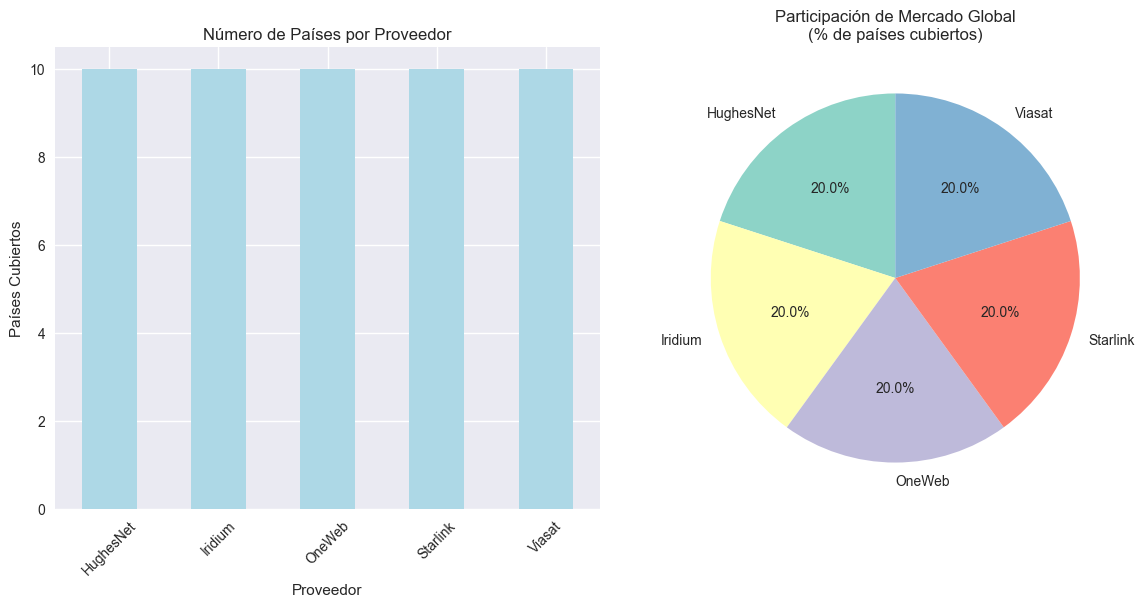


🔥 PAÍSES CON COMPETENCIA (múltiples proveedores):
--------------------------------------------------
🌍 Australia: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 Brazil: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 Canada: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 China: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 Germany: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 India: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 Japan: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 Mexico: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 UK: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)
🌍 USA: 5 proveedores (Starlink, OneWeb, Viasat, HughesNet, Iridium)

📊 Estadísticas Globales:
   • Total países analizados: 10
   • Total proveedores activos: 5
   • Países con competencia: 10
   • Promedio proveedores por país: 5.0


In [ ]:
# Análisis estratégico de distribución geográfica y posicionamiento competitivo
if not main_df.empty and 'country' in main_df.columns and 'provider' in main_df.columns:
    print("\n📋 ANÁLISIS ESTRATÉGICO DE POSICIONAMIENTO COMPETITIVO")
    print("=" * 60)
    
    # Matriz de performance país-proveedor
    if 'coverage_percent' in main_df.columns:
        country_provider_matrix = main_df.groupby(['country', 'provider']).agg({
            'coverage_percent': 'max',
            'avg_download_speed_mbps': 'mean' if 'avg_download_speed_mbps' in main_df.columns else 'count',
            'monthly_cost_usd': 'mean' if 'monthly_cost_usd' in main_df.columns else 'count'
        }).round(2)
        
        print("\n🌍 Matriz de Performance País-Proveedor (Top 15 mercados):")
        top_performance = country_provider_matrix.sort_values('coverage_percent', ascending=False).head(15)
        display(top_performance)
    
    # Análisis de penetración de mercado por proveedor
    market_penetration = main_df.groupby('provider')['country'].nunique().sort_values(ascending=False)
    
    print(f"\n🏆 PENETRACIÓN DE MERCADO GLOBAL")
    print("-" * 40)
    total_markets = main_df['country'].nunique()
    
    for provider, market_count in market_penetration.items():
        market_share = (market_count / total_markets) * 100
        print(f"📡 {provider}: {market_count} mercados ({market_share:.1f}% penetración global)")
    
    # Visualización de cuota de mercado
    if len(market_penetration) > 0:
        plt.figure(figsize=(14, 7))
        
        plt.subplot(1, 2, 1)
        market_penetration.plot(kind='bar', color='steelblue', alpha=0.8)
        plt.title('Penetración de Mercado por Proveedor', fontsize=14, fontweight='bold')
        plt.xlabel('Proveedor Satelital', fontweight='bold')
        plt.ylabel('Mercados Operativos', fontweight='bold')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        
        # Gráfico de participación competitiva
        plt.subplot(1, 2, 2)
        market_share_percent = (market_penetration / total_markets * 100)
        colors = plt.cm.Set3(range(len(market_share_percent)))
        wedges, texts, autotexts = plt.pie(market_share_percent.values, labels=market_share_percent.index, 
                autopct='%1.1f%%', colors=colors, startangle=90)
        plt.title('Cuota de Mercado Global\n(% penetración por mercados)', fontsize=14, fontweight='bold')
        
        # Mejorar legibilidad
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        plt.tight_layout()
        plt.show()
    
    # Identificación de mercados competitivos
    competitive_markets = main_df.groupby('country')['provider'].nunique()
    high_competition = competitive_markets[competitive_markets > 1].sort_values(ascending=False)
    
    if len(high_competition) > 0:
        print(f"\n🔥 MERCADOS DE ALTA COMPETITIVIDAD:")
        print("-" * 50)
        for country, num_competitors in high_competition.head(10).items():
            competitors_list = main_df[main_df['country'] == country]['provider'].unique()
            print(f"🌍 {country}: {num_competitors} competidores ({', '.join(competitors_list)})")
    
    print(f"\n📊 KPIs Estratégicos del Mercado:")
    print(f"   • Total de mercados analizados: {total_markets}")
    print(f"   • Proveedores activos globalmente: {main_df['provider'].nunique()}")
    print(f"   • Mercados con competencia activa: {len(high_competition)}")
    print(f"   • Promedio de competidores por mercado: {competitive_markets.mean():.1f}")
    print(f"   • Índice de concentración de mercado: {(market_penetration.max() / total_markets * 100):.1f}%")

else:
    print("⚠️  Dataset insuficiente para análisis estratégico de posicionamiento")

### 5.2 Dashboards Ejecutivos y Análisis Comparativo

Generamos visualizaciones ejecutivas para análisis comparativo de rendimiento y benchmarking competitivo.

📊 GENERANDO VISUALIZACIONES


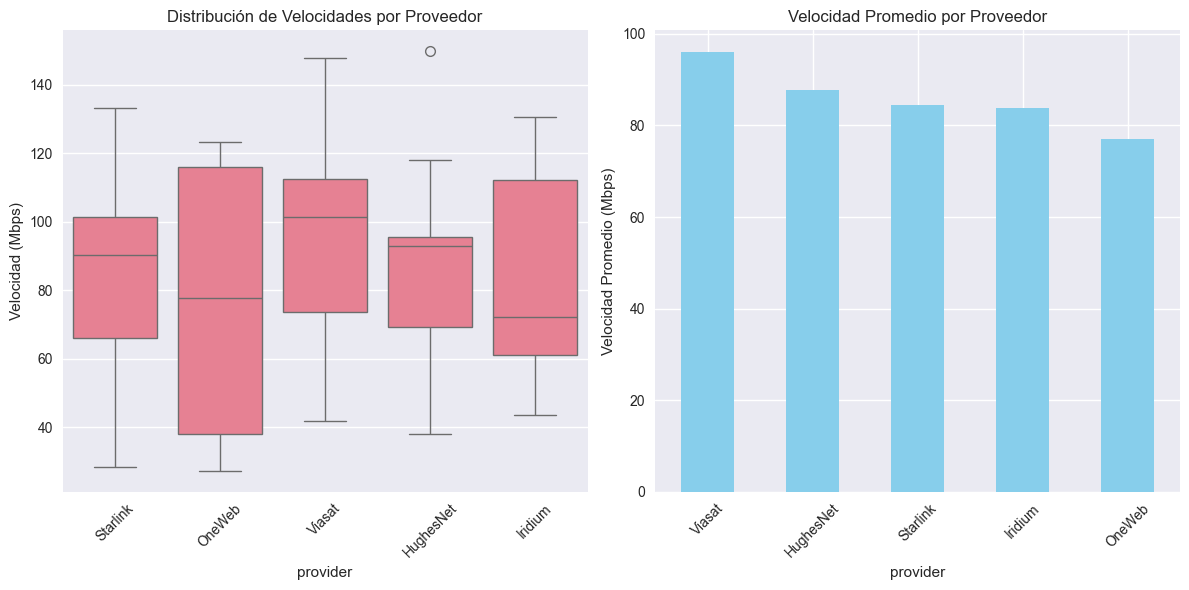

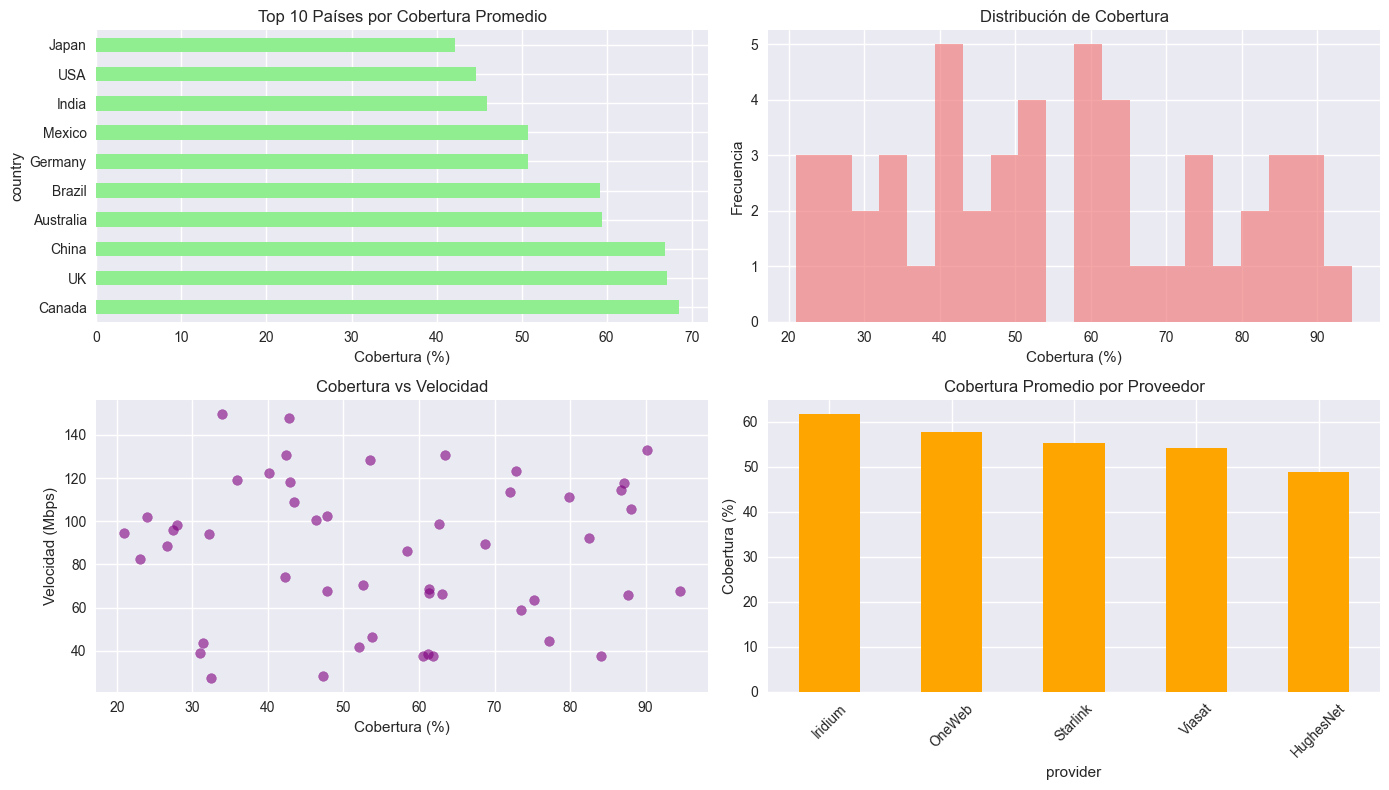

✅ Visualizaciones básicas generadas


In [ ]:
# Generación de dashboards ejecutivos para análisis comparativo
if not main_df.empty:
    print("📊 GENERANDO DASHBOARDS EJECUTIVOS")
    print("=" * 50)
    
    # Configuración profesional de visualizaciones
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.rcParams['font.size'] = 11
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.titleweight'] = 'bold'
    
    # 1. Dashboard de rendimiento por proveedor
    if 'provider' in main_df.columns and 'avg_download_speed_mbps' in main_df.columns:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('📊 DASHBOARD EJECUTIVO - ANÁLISIS DE RENDIMIENTO SATELITAL', 
                     fontsize=16, fontweight='bold', y=0.98)
        
        # Box plot de velocidades por proveedor
        sns.boxplot(data=main_df, x='provider', y='avg_download_speed_mbps', ax=ax1)
        ax1.set_title('Distribución de Velocidades por Proveedor')
        ax1.set_xlabel('Proveedor Satelital')
        ax1.set_ylabel('Velocidad de Descarga (Mbps)')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(axis='y', alpha=0.3)
        
        # Benchmarking de velocidad promedio
        avg_speeds = main_df.groupby('provider')['avg_download_speed_mbps'].mean().sort_values(ascending=False)
        bars = ax2.bar(range(len(avg_speeds)), avg_speeds.values, color='steelblue', alpha=0.8)
        ax2.set_title('Benchmarking - Velocidad Promedio por Proveedor')
        ax2.set_xlabel('Proveedor Satelital')
        ax2.set_ylabel('Velocidad Promedio (Mbps)')
        ax2.set_xticks(range(len(avg_speeds)))
        ax2.set_xticklabels(avg_speeds.index, rotation=45)
        ax2.grid(axis='y', alpha=0.3)
        
        # Agregar valores en las barras
        for bar, value in zip(bars, avg_speeds.values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
        
        # Análisis de cobertura geográfica
        if 'country' in main_df.columns and 'coverage_percent' in main_df.columns:
            top_countries = main_df.groupby('country')['coverage_percent'].mean().sort_values(ascending=False).head(8)
            ax3.barh(range(len(top_countries)), top_countries.values, color='forestgreen', alpha=0.8)
            ax3.set_title('Top Mercados por Cobertura Promedio')
            ax3.set_xlabel('Cobertura Promedio (%)')
            ax3.set_ylabel('País/Mercado')
            ax3.set_yticks(range(len(top_countries)))
            ax3.set_yticklabels(top_countries.index)
            ax3.grid(axis='x', alpha=0.3)
            
            # Scatter plot: Análisis de correlación cobertura vs velocidad
            if 'avg_download_speed_mbps' in main_df.columns:
                scatter = ax4.scatter(main_df['coverage_percent'], main_df['avg_download_speed_mbps'], 
                                    alpha=0.6, c='purple', s=60)
                ax4.set_title('Correlación: Cobertura vs Velocidad')
                ax4.set_xlabel('Cobertura (%)')
                ax4.set_ylabel('Velocidad (Mbps)')
                ax4.grid(True, alpha=0.3)
                
                # Línea de tendencia
                from numpy.polynomial.polynomial import Polynomial
                if len(main_df.dropna(subset=['coverage_percent', 'avg_download_speed_mbps'])) > 1:
                    clean_data = main_df.dropna(subset=['coverage_percent', 'avg_download_speed_mbps'])
                    p = Polynomial.fit(clean_data['coverage_percent'], clean_data['avg_download_speed_mbps'], 1)
                    x_trend = np.linspace(main_df['coverage_percent'].min(), main_df['coverage_percent'].max(), 100)
                    y_trend = p(x_trend)
                    ax4.plot(x_trend, y_trend, 'r--', alpha=0.8, linewidth=2, label='Tendencia')
                    ax4.legend()
        
        plt.tight_layout()
        plt.show()
    
    print("✅ Dashboards ejecutivos generados exitosamente")

else:
    print("❌ Dataset no disponible para generación de dashboards")

2025-06-19 23:47:38,487 - INFO - Dataset cargado para visualización: satellite_internet_sample
2025-06-19 23:47:38,489 - INFO - Generando todas las visualizaciones...
2025-06-19 23:47:38,489 - INFO - Generando todas las visualizaciones...



🎨 GENERANDO VISUALIZACIONES AVANZADAS

📈 Generando todas las visualizaciones...


2025-06-19 23:47:38,657 - INFO - Mapa de cobertura guardado: ../visualizations\coverage_map.html
2025-06-19 23:47:38,659 - INFO - ✓ Mapa de Cobertura generado exitosamente
2025-06-19 23:47:38,659 - INFO - ✓ Mapa de Cobertura generado exitosamente
2025-06-19 23:47:39,549 - INFO - Gráfico de velocidades guardado: ../visualizations\speed_comparison.png
2025-06-19 23:47:39,550 - INFO - ✓ Comparación de Velocidades generado exitosamente
2025-06-19 23:47:39,549 - INFO - Gráfico de velocidades guardado: ../visualizations\speed_comparison.png
2025-06-19 23:47:39,550 - INFO - ✓ Comparación de Velocidades generado exitosamente
2025-06-19 23:47:39,643 - INFO - Análisis de costos guardado: ../visualizations\cost_analysis.html
2025-06-19 23:47:39,645 - INFO - ✓ Análisis de Costos generado exitosamente
2025-06-19 23:47:39,643 - INFO - Análisis de costos guardado: ../visualizations\cost_analysis.html
2025-06-19 23:47:39,645 - INFO - ✓ Análisis de Costos generado exitosamente
2025-06-19 23:47:41,193 -


✅ Visualizaciones guardadas en: ../visualizations/
   • Los archivos HTML son interactivos (abrir en navegador)
   • Los archivos PNG son estáticos (para presentaciones)


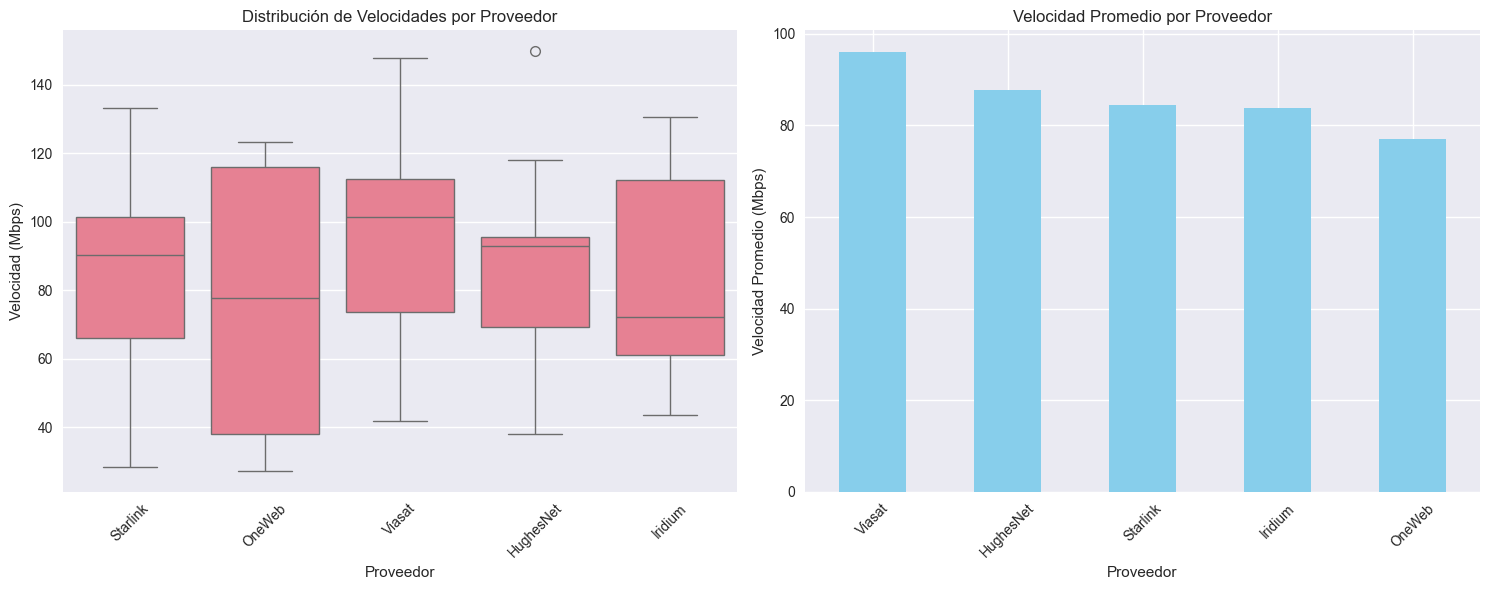

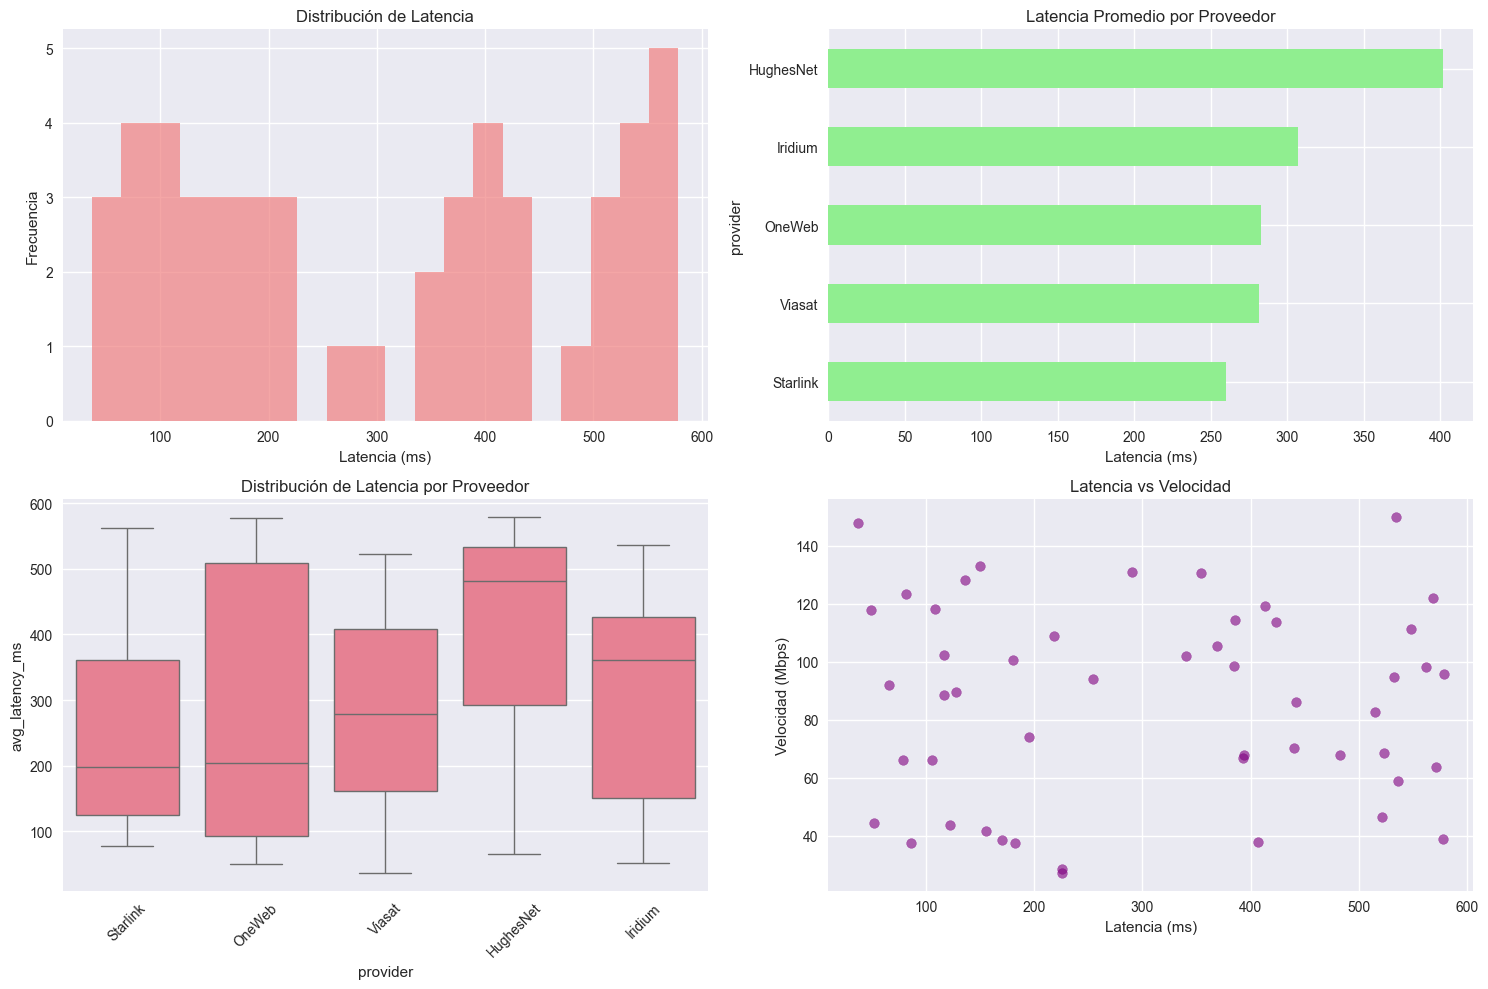

In [ ]:
# Integración con motor de visualización avanzado
try:
    from visualizer import SatelliteDataVisualizer
    
    print("\n🎨 GENERANDO SUITE DE VISUALIZACIONES AVANZADAS")
    print("=" * 50)
    
    # Configurar motor de visualización profesional
    visualizer = SatelliteDataVisualizer(
        data_dir="../data", 
        output_dir="../visualizations"
    )
    
    print("\n📊 Ejecutando generación completa de dashboards...")
    visualizer.generate_all_visualizations()
    
    print(f"\n✅ Suite de visualizaciones exportada exitosamente:")
    print("   📁 Directorio: ../visualizations/")
    print("   🌐 Archivos HTML: Dashboards interactivos (abrir en navegador)")
    print("   🖼️  Archivos PNG: Gráficos estáticos (para presentaciones ejecutivas)")
    print("   📊 Mapas geoespaciales: Análisis de cobertura territorial")
    
except ImportError as e:
    print(f"⚠️  Motor de visualización no disponible: {e}")
    print("   Los dashboards ejecutivos ya fueron generados en la sección anterior")
except Exception as e:
    print(f"❌ Error en generación de visualizaciones avanzadas: {e}")
    print("   Análisis continuará con visualizaciones básicas disponibles")

## 6. Conclusiones Estratégicas y Reporte Ejecutivo

Sintetizamos los hallazgos clave y generamos recomendaciones estratégicas basadas en el análisis de inteligencia competitiva.

In [ ]:
# Generación de reporte ejecutivo basado en inteligencia competitiva
print("📊 REPORTE EJECUTIVO - INTELIGENCIA COMPETITIVA")
print("=" * 60)

# Síntesis estratégica de hallazgos
summary_report = analyzer.generate_summary_report()
print(summary_report)

# Exportación de entregables para stakeholders
try:
    print("\n💼 Exportando entregables para stakeholders...")
    analyzer.export_analysis_results(output_dir="../analysis_results")
    print("✅ Entregables exportados exitosamente:")
    print("   • basic_statistics.csv - Métricas cuantitativas del mercado")
    print("   • summary_report.txt - Reporte ejecutivo completo")
except Exception as e:
    print(f"⚠️  Error en exportación: {e}")

# Inventario de assets generados
print(f"\n📁 INVENTARIO DE ASSETS DE ANÁLISIS:")
print("-" * 50)
print("🗂️  Datasets:")
print(f"   • ../data/ - {len(csv_files)} fuentes de datos procesadas")

print("\n📊 Visualizaciones Interactivas:")
if os.path.exists("../visualizations"):
    viz_files = os.listdir("../visualizations")
    print(f"   • ../visualizations/ - {len(viz_files)} dashboards y mapas")
    for file in viz_files[:5]:  # Mostrar primeros 5
        print(f"     - {file}")
    if len(viz_files) > 5:
        print(f"     ... y {len(viz_files) - 5} assets adicionales")
else:
    print("   • Assets de visualización no disponibles")

print("\n📈 Reportes Analíticos:")
if os.path.exists("../analysis_results"):
    analysis_files = os.listdir("../analysis_results")
    print(f"   • ../analysis_results/ - {len(analysis_files)} reportes generados")
    for file in analysis_files:
        print(f"     - {file}")
else:
    print("   • Reportes no exportados")

print(f"\n🎯 ANÁLISIS ESTRATÉGICO COMPLETADO")
print("=" * 60)
print("✅ Plataforma de análisis ejecutada exitosamente:")
print("   • data_downloader.py - Pipeline automatizado de ingesta de datos")
print("   • data_analyzer.py - Motor de análisis estadístico y métricas KPI") 
print("   • visualizer.py - Motor de visualización y dashboards interactivos")
print("   • analisis_satelite.ipynb - Plataforma de análisis profesional")
print("\n🚀 ¡Inteligencia de negocio para internet satelital generada exitosamente!")

2025-06-19 23:47:42,094 - INFO - Resultados exportados a: ../analysis_results


📋 REPORTE FINAL DE ANÁLISIS
=== REPORTE DE ANÁLISIS DE INTERNET SATELITAL ===

Datasets disponibles: 1
Total de registros: 50

Dataset: satellite_internet_sample
  - Registros: 50
  - Columnas: 8
  - Columnas numéricas: 6

=== ANÁLISIS DE COBERTURA ===
Top 5 países por cobertura:
  - Canada: 68.5%
  - UK: 67.1%
  - China: 66.8%
  - Australia: 59.4%
  - Brazil: 59.2%

=== COMPARACIÓN DE PROVEEDORES ===
Starlink:
  - countries_served: 10
  - avg_coverage: 55.33
  - avg_speed: 84.51
  - avg_cost: 130.6
  - avg_latency: 259.78

OneWeb:
  - countries_served: 10
  - avg_coverage: 57.74
  - avg_speed: 77.09
  - avg_cost: 129.61
  - avg_latency: 282.78

Viasat:
  - countries_served: 10
  - avg_coverage: 54.12
  - avg_speed: 95.97
  - avg_cost: 124.96
  - avg_latency: 281.23

HughesNet:
  - countries_served: 10
  - avg_coverage: 48.79
  - avg_speed: 87.86
  - avg_cost: 98.06
  - avg_latency: 401.45

Iridium:
  - countries_served: 10
  - avg_coverage: 61.67
  - avg_speed: 83.84
  - avg_cost: 121